<div style="text-align:right"><i>Peter Norvig<br>Jan 2026</i></div>

# Truncatable Primes

What's special about [this pencil](https://mathsgear.co.uk/products/truncatable-prime-pencil)?

[![](https://community.wolfram.com//c/portal/getImageAttachment?filename=IMG_20181212_120939.jpg&userId=143131)](https://community.wolfram.com/groups/-/m/t/1569707)

The 24-digit number printed on it is a prime, and as you sharpen the pencil and remove digits one at a time from the left, the resulting numbers are all primes:

    357686312646216567629137 is prime
     57686312646216567629137 is prime
      7686312646216567629137 is prime|
                 ...
                         137 is prime
                          37 is prime
                           7 is prime

Numbers like this are called [**truncatable primes**](https://en.wikipedia.org/wiki/Truncatable_prime). 

I thought I would write a program to find all the truncatable primes. My function `truncatable_primes` below starts with the list of one-digit primes: [2, 3, 5, 7]. Then it creates a list of one-digit-longer new primes by placing each possible digit 1–9 to the left of each of the one-digit primes, and testing if each resulting number is prime. If there are any new primes, it recursively adds digits to them, giving us three-digit primes, then four-digit primes, and so on, stopping when there are no more new primes. In the end, the function returns all the truncatable primes in sorted order.

In [1]:
from sympy import isprime # isprime(n) returns True if n is a prime

def truncatable_primes(primes=[2, 3, 5, 7]) -> list[int]:
    """All truncatable primes, in ascending order."""
    new_primes = [dp for d in "123456789" for p in primes if isprime(dp := int(d + str(p)))]
    if new_primes:
        return primes + truncatable_primes(new_primes)
    else:
        return primes

Let's see how many truncatable primes there are:

In [2]:
TP = truncatable_primes()

len(TP)

4260

There are **4260** of these truncatable primes. Here are the smallest and largest of them:

In [3]:
TP[:16]

[2, 3, 5, 7, 13, 17, 23, 37, 43, 47, 53, 67, 73, 83, 97, 113]

In [4]:
TP[-16:]

[66276812967623946997,
 67986315421273233617,
 86312646216567629137,
 315396334245663786197,
 367986315421273233617,
 666276812967623946997,
 686312646216567629137,
 918918997653319693967,
 5918918997653319693967,
 6686312646216567629137,
 7686312646216567629137,
 9918918997653319693967,
 57686312646216567629137,
 95918918997653319693967,
 96686312646216567629137,
 357686312646216567629137]

What if you sharpen the pencil from the other end? The primes we found so far are called **left-truncatable primes**; there are also **right-trunctable primes**:

In [5]:
def right_truncatable_primes(primes=[2, 3, 5, 7]) -> list[int]:
    """All right-truncatable primes, in ascending order."""
    # Only consider (1, 3, 7, 9) as the digit on the right; placing any other digit forms a composite number
    new_primes = [pd for p in primes for d in (1, 3, 7, 9) if isprime(pd := 10 * p + d)]
    if new_primes:
        return primes + right_truncatable_primes(new_primes)
    else:
        return primes

In [6]:
TPr = right_truncatable_primes()

len(TPr)

83

There are only 83 right-truncatable primes. Here they are:

In [7]:
print(TPr)

[2, 3, 5, 7, 23, 29, 31, 37, 53, 59, 71, 73, 79, 233, 239, 293, 311, 313, 317, 373, 379, 593, 599, 719, 733, 739, 797, 2333, 2339, 2393, 2399, 2939, 3119, 3137, 3733, 3739, 3793, 3797, 5939, 7193, 7331, 7333, 7393, 23333, 23339, 23399, 23993, 29399, 31193, 31379, 37337, 37339, 37397, 59393, 59399, 71933, 73331, 73939, 233993, 239933, 293999, 373379, 373393, 593933, 593993, 719333, 739391, 739393, 739397, 739399, 2339933, 2399333, 2939999, 3733799, 5939333, 7393913, 7393931, 7393933, 23399339, 29399999, 37337999, 59393339, 73939133]


We can also find the **two-sided truncatable primes**, which are both right- and left-truncatable. It turns out there are only 15 of them:

In [8]:
set(TP) & set(TPr)

{2, 3, 5, 7, 23, 37, 53, 73, 313, 317, 373, 797, 3137, 3797, 739397}

There isn't an official name for a truncatable prime that remains prime for all possible choices of truncating either the rightmost or leftmost digit at each step. I'll call them **omni-truncatable primes**. I can compute them like this:

In [9]:
def is_omni_truncatable_prime(n: int) -> bool:
    """Is n a truncatable prime for all possible choices of truncating digits from left or right?"""
    return (isprime(n) and
            (n < 10 or (is_omni_truncatable_prime(int(str(n)[1:])) and
                        is_omni_truncatable_prime(int(str(n)[:-1])))))

[p for p in TP if is_omni_truncatable_prime(p)]

[2, 3, 5, 7, 23, 37, 53, 73, 373]

There are only 9 of them, with 373 the largest.

What about primes that are both truncatable and [**palindromic primes**](https://en.wikipedia.org/wiki/Palindromic_prime)?

In [10]:
{p for p in TP + TPr if str(p) == str(p)[::-1]}

{2, 3, 5, 7, 313, 353, 373, 383, 797, 76367, 79397, 7693967, 799636997}

There are 13 **palindromic truncatable primes**.

# Digit Lengths

How many digits are in these truncatable primes? The function `digit_lengths` returns a {number_of_digits: count_of_primes_with_that_many_digits} dict, and plots a bar chart for that data:

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

def digit_lengths(primes) -> dict[int, int]:
    """Plot a bar chart and return a dict of the number of digits in these primes."""
    digits = Counter(len(str(p)) for p in primes)
    plt.bar(list(digits), list(digits.values()))
    plt.xlabel('Number of digits'); plt.ylabel('Count')
    return dict(digits)

First for the **left-truncatable primes**:

{1: 4,
 2: 11,
 3: 39,
 4: 99,
 5: 192,
 6: 326,
 7: 429,
 8: 521,
 9: 545,
 10: 517,
 11: 448,
 12: 354,
 13: 276,
 14: 212,
 15: 117,
 16: 72,
 17: 42,
 18: 24,
 19: 13,
 20: 6,
 21: 5,
 22: 4,
 23: 3,
 24: 1}

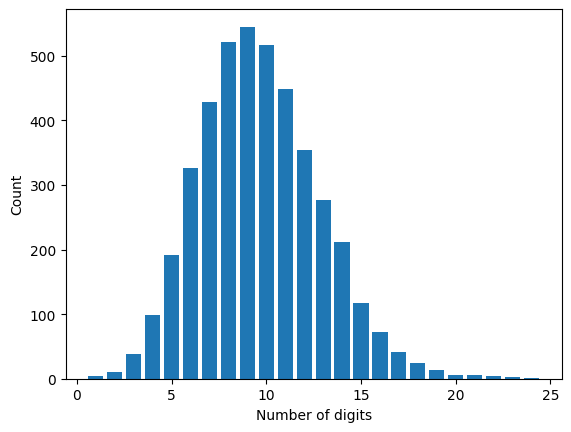

In [12]:
digit_lengths(TP)

And for the **right-truncatable** primes:

{1: 4, 2: 9, 3: 14, 4: 16, 5: 15, 6: 12, 7: 8, 8: 5}

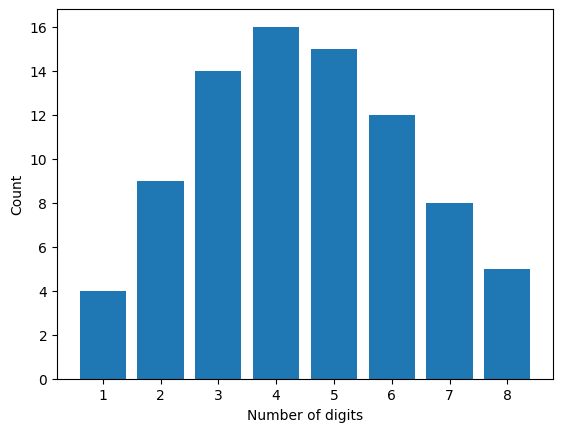

In [13]:
digit_lengths(TPr)

# Summary of Truncatable Prime Facts

Here's what we learned:

- Left-trunctable primes:
  - Count: 4260
  - Largest: 357686312646216567629137 (24 digits)
  - The plurality have 9 digits; only 13 have more than 20 digits
- Right-truncatable primes:
  - Count: 83
  - Largest: 73939133 (8 digits)
  - The plurality have 4 digits
- Two-sided truncatable primes:
  - Count: 15
  - Largest: 739397 (6 digits)
- Omni-truncatable primes:
  - Count: 9
  - Largest: 373
- Palindromic truncatable primes:
  - Count: 13
  - Largest: 799636997 (9 digits)


# Primality Testing

I was very impressed with the speed of the function [`sympy.isprime`](https://github.com/sympy/sympy/blob/master/sympy/ntheory/primetest.py), and I wanted to investigate the topic of primality testing. I'll start by defining `isprime_simple`, which follows the definition of a prime number almost verbatim:

In [14]:
def isprime_simple(n: int) -> bool:
    """Simple primality tester. A prime number is defined as an integer greater than 1 
    that cannot be evenly divided by any whole number other than 1 and itself."""
    divisors = range(2, n)
    return n > 1 and not any(n % d == 0 for d in divisors)

To test a *d*-digit prime we have to iterate through nearly 10<sup>d</sup> divisors, which will be noticeably slow for anything larger than about 7-digit numbers.

We can speed things up a bit with two ideas, one small and one bigger. The small idea is to cut the run time in half by only testing the odd divisors (after determining that 2 is a prime and all other even numbers are composite). The bigger idea is that we only need to test divisors up to √*n*, not up to *n*. If *n* is composite, then *n* is the product of two numbers, and one of them must be less than or equal to √*n*, so we can stop there.

In [15]:
from math import sqrt

def isprime_faster(n: int) -> bool:
    """More sophisticated primality tester: test only odd divisors up to √n."""
    if n <= 10:                   # Handle small numbers up to 10
        return n in (2, 3, 5, 7)
    elif n % 2 == 0:              # Even numbers other than 2 are composite
        return False
    else:                         # test odd divisors up to sqrt(n)
        divisors = range(11, int(sqrt(n)) + 1, 2) 
        return not any(n % d == 0 for d in divisors)

For a 24-digit prime, `isprime_simple` would need to test trillions of trillions of divisors, while `isprime_faster` would "only" need to test trillions. That's the difference between never completing and taking a few hours. But we would like the test to take milliseconds. We need a massive breakthrough. 

Fortunately, [Pierre de Fermat](https://en.wikipedia.org/wiki/Pierre_de_Fermat) provided that  breakthrough in 1640! 

# Probabilistic Primality Testing

[Fermat's little theorem](https://en.wikipedia.org/wiki/Fermat%27s_little_theorem) states that if *n* is prime and *a* is not divisible by *n*, then:

&nbsp; &nbsp; &nbsp; &nbsp; *a*<sup>(*n* - 1)</sup> ≡ 1 (mod *n*). 

We can use the theorem to create a [Fermat primality test](https://en.wikipedia.org/wiki/Fermat_primality_test): given an integer *n*, choose a random *a* and test if *a*<sup>(*n* - 1)</sup> ≡ 1 (mod *n*). If the test is false then *n* is definitely composite. If the test is true, then we're not sure: *n* might be prime, might not. But if we choose multiple values of *a* and they all give a remainder of 1 (mod *n*), then that is stronger evidence that *n* is probably prime. 
For example:


|*n*|*a*|*a*<sup>(*n* - 1)</sup> (mod *n*)|Conclusion|
|--:|--:|:--:|:--|
|12|5|5|*12 is definitely composite*|
|221|18|1|*221 could be prime or composite*|
|221|2|16|*try again with new **a** value: 221 is definitely composite*|
|5|2|1|*5 could be prime or composite*|
|5|3|1|*try again: 5 could still be prime or composite*|
|5|4|1|*try again: 5 could still be prime or composite, but a lot of evidence that it is prime*|


This is called a [Monte Carlo algorithm](https://en.wikipedia.org/wiki/Monte_Carlo_algorithm); an algorithm that uses [randomization](https://en.wikipedia.org/wiki/Randomized_algorithm), and can sometimes be wrong. Here is an implementation:

In [16]:
def isprime_fermat(n: int, k=20) -> bool:
    """n is probably a prime if this returns True; definitely composite if it returns False."""
    if n <= 10:
        return n in (2, 3, 5, 7)
    else:
        return all(pow(a, n - 1, n) == 1 for a in sample(2, n, k))

We need a way to take random samples of integers from a range:

In [17]:
import random
from typing import Iterable
    
def sample(start: int, stop: int, k: int) -> Iterable[int]:
    """Randomly sample `k` integers from range(start, stop), one by one."""
    return (random.randrange(start, stop) for _ in range(k))

(*Note* that `pow(a, n - 1, n)` computes *a*<sup>(*n* - 1)</sup> (mod *n*) very efficiently; see the last section of this notebook.)

**Unfortunately**, `isprime_fermat` can lie: it can incorrectly report a **false prime** for a composite number *n*. 

How common are these false primes? Here's a function to test a sample of numbers and report the the percentage of false primes when `isprime_fermat` is allowed `k` choices of the `a` parameter:

In [18]:
from statistics import mean

def false_prime_percent(samples: Iterable[int], k: int) -> float:
    """The estimated percentage of false primes from isprime_fermat(n, k) for n across the samples."""
    composites = (n for n in samples if not isprime(n))
    return mean(100 * isprime_fermat(n, k) for n in composites)

We'll choose sample ranges that represent digit-lengths, sample 200,000 times for each digit-length, and for now look at `k=1` values of *a*:

In [19]:
{d: false_prime_percent(sample(10**(d-1), 10**d, 200_000), k=1) for d in range(3, 13)}

{3: 1.433229785995569,
 4: 0.47277977521728054,
 5: 0.12450624459417024,
 6: 0.04328208013677137,
 7: 0.010154128989503837,
 8: 0.0021231309812580613,
 9: 0.0005263573440008422,
 10: 0,
 11: 0,
 12: 0}

We see that 3-digit composites are falsely called prime about 1.4% of the time, and 4-digit comnposites about 0.5%, but once we get to 9- or 10-digit composites, false primes are very rare indeed. Remember these are percents, not probabilities, so 0.001% is one in a hundred thousand.

Let's see how we reduce false primes by allowing `k=25` choices of  `a`:

In [20]:
{d: false_prime_percent(sample(10**(d-1), 10**d, 300_000), k=25) for d in range(3, 13)}

{3: 0,
 4: 0,
 5: 0,
 6: 0.0003613604498214879,
 7: 0.000356548185704557,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0}

The results are randomized, and in some runs this produces no false primes; in some runs a few get through. 

There are a few numbers, called [**Carmichael numbers**](https://en.wikipedia.org/wiki/Carmichael_number), that have a very high false prime percentage. [Some Carmichael numbers](https://oeis.org/A033502) are worse than others. 

We can test some of them:

In [21]:
carmichael_numbers = (561, 1105, 1729, 2465, 2821, 6601, 8911, 41041, 101101, 294409, 340561, 825265, 
                      56052361, 118901521, 172947529, 216821881, 1299963601, 2301745249, 9624742921)

{n: false_prime_percent([n] * 10_000, k=1) for n in carmichael_numbers}

{561: 56.84,
 1105: 69.72,
 1729: 74.68,
 2465: 72.79,
 2821: 76.78,
 6601: 80.1,
 8911: 80.1,
 41041: 70.28,
 101101: 71.63,
 294409: 95.18,
 340561: 81.13,
 825265: 59.82,
 56052361: 99.19,
 118901521: 99.24,
 172947529: 99.45,
 216821881: 99.4,
 1299963601: 99.65,
 2301745249: 99.76,
 9624742921: 99.9}

This is bad; some error rates are above 99%. Increasing `k` can fix the numbers with a 60% or 70% error rate, but not the ones with a 99% error rate:

In [22]:
{n: false_prime_percent([n] * 100, k=50) for n in carmichael_numbers}

{561: 0,
 1105: 0,
 1729: 0,
 2465: 0,
 2821: 0,
 6601: 0,
 8911: 0,
 41041: 0,
 101101: 0,
 294409: 4,
 340561: 0,
 825265: 0,
 56052361: 58,
 118901521: 66,
 172947529: 80,
 216821881: 86,
 1299963601: 90,
 2301745249: 87,
 9624742921: 94}

So our Fermat test is mostly reliable, but a few composite numbers will consistently be identified as false primes.

**Fortunately**, there are variations on Fermat's idea that always give the right answer. `sympy.isprime` ([source code here](https://github.com/sympy/sympy/blob/master/sympy/ntheory/primetest.py)) uses the [Miller-Rabin test](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test) (sometimes called Rabin-Miller, but I give Gary Miller precedence because he is my former colleague). The algorithm is guaranteed to give the right answer, but it does start to get slow for very large numbers. `sympy.isprime` gains efficiency by breaking the range of *n* values into subranges and cleverly precomputing a list of *a* values that work for every *n* in a subrange. For numbers greater than 2<sup>64</sup>, `sympy.isprime` falls back on the [Baillie–PSW test](https://en.wikipedia.org/wiki/Baillie%E2%80%93PSW_primality_test), which is faster than Miller-Rabin, but is probabilistic. There are no known counterexamples found so far (no equivalent of the Carmichael numbers for the Baillie-PSW test), but no proof that such numbers don't exist.

# Speed of Primality testing

**The great thing** about `isprime_fermat` and `sympy.isprime` is that they are **very fast**, handling 32-digit primes in well under a millisecond. Let's create a list of big primes in ascending order of digit-length from 5 to 32:

In [23]:
big_primes = [*[int('357686312646216567629137'[-i:]) for i in range(5, 25)], # left-truncated primes
              # The following primes sourced from t5k.org/curios/
              1000000000000000035000061, 59999999999899999999999999, 100000109999990000011000001,
              2728487949505050529272727777, 24444666666888888889999999991, 100003100019100043100057100069,
              9999999999999999777777775555331, 55555555555555555555555555555559]

Now let's make a chart of all the prime functions running on the big primes:

In [24]:
import timeit

prime_tests = (isprime_simple, isprime_faster, isprime_fermat, isprime)

def plot_run_times(primes, functions=prime_tests):
    """For each primality-testing function, plot its run time on primes of different digit-lengths."""
    plt.figure(figsize=(9, 6))
    for function in functions:
        plt.plot(*time_test(function, primes), 'o-', label=function.__name__)
    plt.grid(True, axis='y', which="major", ls=':', color='gray')
    plt.xticks(range(len(str(min(primes))), len(str(max(primes))) + 1))
    plt.yscale('log')
    plt.xlabel('Number of digits in prime')
    plt.ylabel('Run time in seconds (log scale)')
    plt.legend()

def time_test(function, primes) -> tuple[list[int], list[float]]:
    """Time the function on each of the primes, stopping when one exceeds a second.
    Return a list of the digit sizes and a list of the corresponding run times."""
    D, T = [], [] # D is length of primes in digits; T is time in seconds
    repeat = (1 if function == isprime_simple else 200)
    for p in primes:
        time = timeit.timeit(lambda: function(p), number=repeat) / repeat
        D.append(len(str(p)))
        T.append(time)
        if time > 1:
            break # Stop tsting a function once it takes over a second of run time
        elif time > 1e-3:
            repeat = 1
    return D, T

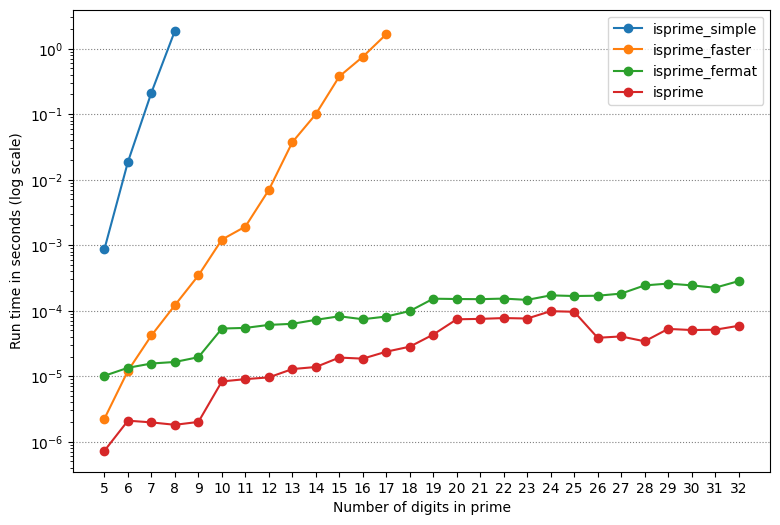

In [25]:
plot_run_times(big_primes)

What have we learned about timing?
- `isprime_simple` has a run time of *O*(*n*)
- `isprime_faster` has a run time of *O*(√*n*); we see its slope is half as steep on the log-log graph
- `isprime_fermat` and `isprime` ([according to Wikipedia](https://en.wikipedia.org/wiki/Fermat_primality_test)) have a run time of *O*(*k* log<sup>2</sup>*n*), where *k* is the number of repeats 
- `isprime_faster` is more than 10,000 times faster than `isprime_simple` on 8-digit primes
- `isprime_fermat` is more than 10,000 times faster than `isprime_faster` on 17 digit primes
- `isprime` is about twice as fast as `isprime_fermat`
  - (but that's quite good for `isprime_fermat` considering how much simpler it is: 10 lines versus 800)
- `isprime` produces no known incorrect answers; `isprime_fermat` will on rare occasion produce a false prime

It is good to get the timing results, but I should also run some test cases to demonstrate correctness:

In [26]:
for fn in prime_tests:
    assert all(fn(p) for p in (2, 3, 5, 7, 11, 37, 73, 101, 11939, 65537, 117223, 7629137))   # primes
    assert all(fn(n) is False for n in (0, 1, 4, 6, 8, 9, 10, 256, 11939*11939, 11939*65537)) # composites

This was fun for me! I remember being amazed by Fermat's Little Theorem when I learned about it in [Prof. Michael Rosen's](https://mathematics.brown.edu/people/michael-rosen) number theory class in college, but I never worked through the details of how often the test gives a false prime result until now. 

That number theory class was important for me in several ways. First, it was hard fun. Second, it was the first class that felt like actually *doing* math, rather than being taught some techniques to prepare you to do math some time in the future. And third, I learned a valuable lesson: there was a take-home final exam, handed out Friday and due Monday. I worked on it all day Saturday, and couldn't answer a single one of the ten problems. At that point, I thought to myself "This never happens on my computer science assignments; I guess I'm more cut out for CS than math." On Sunday I came back to it and eventually got answers to most of the problems. (I remember that on one problem, Prof. Rosen said "You had a very elegant solution for that one, better than the answer I expected. But then I realized it was so good, it could be extended to be a trivial solution to this known difficult problem, and so I looked more closely and noticed a flaw in your argument. Too bad.")

# Note on Modular Exponentiation

Just one more thing: none of this would work unless we can efficiently compute *a*<sup>(*n* - 1)</sup> (mod *n*).  How does the `pow` builtin function do it? When *a* and *n* are 24-digit numbers, if we naively tried to compute `a ** (n - 1)`, we'd have two problems: we'd need nearly a billion petabytes to store the result, and we'd need centuries to compute it. The way around these problems is to use [modular exponentiation](https://en.wikipedia.org/wiki/Modular_exponentiation) where we apply the modulus to each intermediate result, and cut the exponent in half each iteration, so we need only do *O*(log *n*) multiplications, not *O*(*n*). That's a big difference: 10<sup>24</sup> is a trillion trillion, and log<sub>2</sub>(10<sup>24</sup>) is only 80. 

The key idea is that *b*<sup>2*e*</sup> is equal to (*b* × *b*)<sup>*e*</sup>. Here is an implementation:

In [27]:
def modpow(b: int, e: int, m: int) -> int:
    """Compute b**e mod m, efficiently."""
    return (1    if e == 0 else
            b    if e == 1 else
            modpow((b * b) % m, e // 2, m)   if e % 2 == 0 else
            modpow((b * b) % m, e // 2, m) * b % m)

We can see this function is fast and that it correctly computes the remainder of 1 for the following:

In [28]:
a = 123456789012345678901234
n = 357686312646216567629137

%time modpow(a, n - 1, n)

CPU times: user 25 μs, sys: 0 ns, total: 25 μs
Wall time: 27.2 μs


1

I hope you have enjoyed this excursion into the world of primes!